# 1 Introduction

## 1.1 Description & Disscusion of the Background

### The city of Chengdu is  the biggest city in south-east China . Chengdu is the capital of Sichuan Province, a mega city, the core city of Chengdu metropolitan area, an important central city in western China approved by the State Council, an important national high-tech industrial base, trade and logistics center and comprehensive transportation hub.By 2020, the city has jurisdiction over 12 districts, 3 counties and 5 county-level cities, with a total area of 14,335 square kilometers.In 2019, the built-up area covered 949.6 square kilometers, with a permanent resident population of 16,581,000 and an urban population of 12,337,900, representing an urbanization rate of 74.41%.

###  Because of its economic importance and large population, chengdu's real estate prices remain high.As a commercial investor, he would like to know where the real estate investment cost will be lower and the commercial competition will be less fierce. In such a region, more commercial income will be obtained with less cost.

### Therefore, in the following part, I will use the method of data science to visualize the housing price of various regions in Chengdu on the map in the form of thermal chart.In addition, I would use the Forsquare Api to get venue information and cluster them on the map.In this way, we will consider the conduct of the business on both of the real estate price and the intense of business competition.

## 1.2 Data Description

### To solve this problem, we need the following data:

### \$ \bigstar\$ I found the average real estate price data of each Borough in Chengdu on the website of www.anjuke.com

### \$ \bigstar\$ I used Forsquare API to get the most common venues of given Borough of Chengdu

### \$ \bigstar\$I used Baidu Map API to obtain the center longitude and latitude of each Borough in Chengdu

### \$ \bigstar\$ I use Aliyun API to get the geojson data of  each Borough in Chengdu

In [207]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# Get Boroughs and geo data of Chengdu

In [208]:
data = pd.read_excel('ChengduBorough.xlsx')
data

,Borough,longitude,latitude,EestatePrice
0,ChenHua,104.153661,30.681403,16135
1,WuHou,104.055946,30.645411,17288
2,JinJiang,104.121031,30.632947,20100
3,LongQuanYi,104.313177,30.596178,11577
4,QinYang,104.020544,30.674066,20329
5,PiDu,103.871470,30.852131,10102
6,WenJiang,103.834341,30.726763,11323
7,XinDu,104.157378,30.832607,10794
8,ShuangLiu,103.958189,30.565774,13276
9,JinNiu,104.055669,30.716153,14695


# Explore and cluster the Boroughs in Chengdu

In [209]:
# Define Foousquare api credential
CLIENT_ID = 'C0LKZBIJT2AQ5H0B5AB4RCSBLCYIMX3G1MHULKIJU0QTCZO5' # your Foursquare ID
CLIENT_SECRET = 'S0SUZGXMEQYIITQ4GTLKN2WVOR0X2WYUYHVCF52102L5CYKF' # your Foursquare Secret
VERSION = '20180605'

In [210]:
latitude = 30.663429
longitude = 104.072422
print('The geograpical coordinate of Chengdu are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chengdu are 30.663429, 104.072422.


In [211]:
# create map of New York using latitude and longitude values
map_chengdu = folium.Map(location=[latitude, longitude], zoom_start=11)
map_chengdu

In [212]:
for lat, lng, borough in zip(data['latitude'], data['longitude'], data['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chengdu)  
    
map_chengdu

In [213]:
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 5000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=C0LKZBIJT2AQ5H0B5AB4RCSBLCYIMX3G1MHULKIJU0QTCZO5&client_secret=S0SUZGXMEQYIITQ4GTLKN2WVOR0X2WYUYHVCF52102L5CYKF&v=20180605&ll=30.663429,104.072422&radius=5000&limit=500'

In [214]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ef7493be0d74740ceef6551'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Chengdu',
  'headerFullLocation': 'Chengdu',
  'headerLocationGranularity': 'city',
  'totalResults': 134,
  'suggestedBounds': {'ne': {'lat': 30.708429045000045,
    'lng': 104.12463912998804},
   'sw': {'lat': 30.618428954999956, 'lng': 104.02020487001197}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '55fe3c3c498e557258e413e6',
       'name': 'Starbucks Reserve (星巴克甄选)',
       'location': {'address': 'Taisheng S Rd',
        'crossStreet': '2/F The One',
        'lat': 30.662987574550847,
        'lng': 104.07160475365173,
        'labeledLatLngs': [{'label': 'dis

In [215]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [216]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

C:\Users\mac\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Starbucks Reserve (星巴克甄选),Coffee Shop,30.662988,104.071605
1,"The Ritz-Carlton, Chengdu (成都富力丽思卡尔顿酒店)",Hotel,30.666959,104.067618
2,Niccolo Chengdu,Hotel,30.657128,104.080289
3,The St. Regis Chengdu (成都瑞吉酒店),Hotel,30.663286,104.072057
4,Taikoo Li (太古里),Shopping Mall,30.655020,104.081711
5,The Temple House (博舍),Hotel,30.653936,104.082239
6,Fraser Suites Chengdu (成都仁恒辉盛阁国际公寓),Hotel,30.654694,104.065605
7,和幸 とんかつ Tonkatsu Wako,Japanese Restaurant,30.656739,104.076326
8,方所 Fangsuo Commune,Bookstore,30.655600,104.080319
9,Wen Shu Monastery (文殊院),Temple,30.677062,104.070378


In [217]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [218]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [219]:
chengdu_venues = getNearbyVenues(names=data['Borough'],
                                   latitudes=data['latitude'],
                                   longitudes=data['longitude']
                                  )

ChenHua
WuHou
JinJiang
LongQuanYi
QinYang
PiDu
WenJiang
XinDu
ShuangLiu
JinNiu
JianYang
ChongZhou
QiongLai
PengZhou
DuJiangYan
XinJin
PuJiang
DaYi
JinTang
QingBaiJiang


In [220]:
print(chengdu_venues.shape)
chengdu_venues.head(30)

(352, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ChenHua,30.681403,104.153661,Chengdu Eastern Suburb Memory (东郊记忆),30.671010,104.119535,Music Venue
1,ChenHua,30.681403,104.153661,Ito Yokado (伊藤洋华堂),30.673877,104.107265,Shopping Mall
2,ChenHua,30.681403,104.153661,Starbucks (星巴克),30.669571,104.109794,Coffee Shop
3,ChenHua,30.681403,104.153661,Starbucks (星巴克),30.673792,104.108003,Coffee Shop
4,ChenHua,30.681403,104.153661,Starbucks (星巴克),30.677556,104.106319,Coffee Shop
5,ChenHua,30.681403,104.153661,SUBWAY (赛百味),30.670865,104.108734,Sandwich Place
6,ChenHua,30.681403,104.153661,SM City (SM广场),30.669919,104.110056,Shopping Mall
7,ChenHua,30.681403,104.153661,Pizza Hut (必胜客),30.673541,104.107753,Pizza Place
8,ChenHua,30.681403,104.153661,McDonald's (麦当劳),30.672012,104.108451,Fast Food Restaurant
9,ChenHua,30.681403,104.153661,鱼眼儿咖啡 Fisheye Cafe,30.673577,104.124169,Café


In [221]:
chengdu_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ChenHua,12,12,12,12,12,12
ChongZhou,10,10,10,10,10,10
DaYi,4,4,4,4,4,4
DuJiangYan,8,8,8,8,8,8
JianYang,4,4,4,4,4,4
JinJiang,73,73,73,73,73,73
JinNiu,24,24,24,24,24,24
JinTang,7,7,7,7,7,7
LongQuanYi,6,6,6,6,6,6


In [222]:
print('There are {} uniques categories.'.format(len(chengdu_venues['Venue Category'].unique())))

There are 87 uniques categories.


In [223]:
# one hot encoding
chengdu_onehot = pd.get_dummies(chengdu_venues[['Venue Category']], prefix="", prefix_sep="")
chengdu_onehot.head()
# add neighborhood column back to dataframe
chengdu_onehot.insert(0,'Neighborhood',chengdu_venues['Neighborhood']) 
chengdu_onehot.head()

,Neighborhood,Airport,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Art Gallery,Art Museum,Asian Restaurant,Auto Workshop,BBQ Joint,Bakery,Bar,Beach,Big Box Store,Bookstore,Brewery,Bus Station,Business Service,Café,Chinese Restaurant,Cocktail Bar,Coffee Shop,Convenience Store,Department Store,Donut Shop,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Food Court,Furniture / Home Store,German Restaurant,Greek Restaurant,Grocery Store,Gym / Fitness Center,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Lake,Metro Station,Mexican Restaurant,Mountain,Movie Theater,Multiplex,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Other Nightlife,Outlet Mall,Park,Pedestrian Plaza,Pizza Place,Plaza,Pub,Public Art,Resort,Restaurant,River,Sandwich Place,Shopping Mall,Shopping Plaza,Shrine,Snack Place,Soup Place,Sporting Goods Shop,Supermarket,Szechuan Restaurant,Tea Room,Temple,Thai Restaurant,Theater,Tibetan Restaurant,Train Station,Vegetarian / Vegan Restaurant,Warehouse Store,Water Park,Women's Store,Zhejiang Restaurant,Zoo Exhibit
0,ChenHua,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ChenHua,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ChenHua,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ChenHua,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ChenHua,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [224]:
chengdu_onehot.shape

(352, 88)

In [225]:
chengdu_grouped = chengdu_onehot.groupby('Neighborhood').mean().reset_index()
chengdu_grouped

,Neighborhood,Airport,Airport Lounge,Airport Service,American Restaurant,Amphitheater,Art Gallery,Art Museum,Asian Restaurant,Auto Workshop,BBQ Joint,Bakery,Bar,Beach,Big Box Store,Bookstore,Brewery,Bus Station,Business Service,Café,Chinese Restaurant,Cocktail Bar,Coffee Shop,Convenience Store,Department Store,Donut Shop,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Food Court,Furniture / Home Store,German Restaurant,Greek Restaurant,Grocery Store,Gym / Fitness Center,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Lake,Metro Station,Mexican Restaurant,Mountain,Movie Theater,Multiplex,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Other Nightlife,Outlet Mall,Park,Pedestrian Plaza,Pizza Place,Plaza,Pub,Public Art,Resort,Restaurant,River,Sandwich Place,Shopping Mall,Shopping Plaza,Shrine,Snack Place,Soup Place,Sporting Goods Shop,Supermarket,Szechuan Restaurant,Tea Room,Temple,Thai Restaurant,Theater,Tibetan Restaurant,Train Station,Vegetarian / Vegan Restaurant,Warehouse Store,Water Park,Women's Store,Zhejiang Restaurant,Zoo Exhibit
0,ChenHua,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.083333,0.000000,0.083333,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.083333,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.250000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,ChongZhou,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.100000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.1,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.1,0.000000,0.000000
2,DaYi,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.25,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,DuJiangYan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.125000,0.000000,0.000000,0.000000,0.000000,0.125,0.000000,0.000000,0.0,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [226]:
chengdu_grouped.shape

(20, 88)

In [227]:
num_top_venues = 5

for hood in chengdu_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = chengdu_grouped[chengdu_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ChenHua----
                  venue  freq
0         Shopping Mall  0.25
1           Coffee Shop  0.25
2        Sandwich Place  0.08
3           Pizza Place  0.08
4  Fast Food Restaurant  0.08


----ChongZhou----
            venue  freq
0           Hotel   0.2
1   Women's Store   0.1
2  Shopping Plaza   0.1
3     Coffee Shop   0.1
4   Train Station   0.1


----DaYi----
                  venue  freq
0  Fast Food Restaurant  0.25
1     Fish & Chips Shop  0.25
2                 Hotel  0.25
3            Restaurant  0.25
4               Airport  0.00


----DuJiangYan----
              venue  freq
0     Historic Site  0.25
1             Hotel  0.25
2     Shopping Mall  0.12
3  Asian Restaurant  0.12
4       Bus Station  0.12


----JianYang----
               venue  freq
0  Hotpot Restaurant  0.50
1              Hotel  0.25
2         Soup Place  0.25
3            Airport  0.00
4    Other Nightlife  0.00


----JinJiang----
                  venue  freq
0           Coffee Shop  0.11
1  Fast 

In [228]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [229]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chengdu_grouped['Neighborhood']

for ind in np.arange(chengdu_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chengdu_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ChenHua,Coffee Shop,Shopping Mall,Pizza Place,Café,Sandwich Place,Bus Station,Music Venue,Fast Food Restaurant,Food Court,Department Store
1,ChongZhou,Hotel,Women's Store,Chinese Restaurant,Train Station,Hotpot Restaurant,Thai Restaurant,Shopping Plaza,Coffee Shop,Bakery,Zoo Exhibit
2,DaYi,Restaurant,Hotel,Fast Food Restaurant,Fish & Chips Shop,German Restaurant,Convenience Store,Department Store,Donut Shop,Electronics Store,Food Court
3,DuJiangYan,Hotel,Historic Site,Shopping Mall,Asian Restaurant,Bus Station,Beach,Zoo Exhibit,German Restaurant,Donut Shop,Electronics Store
4,JianYang,Hotpot Restaurant,Hotel,Soup Place,Zoo Exhibit,German Restaurant,Department Store,Donut Shop,Electronics Store,Fast Food Restaurant,Fish & Chips Shop


In [230]:
# set number of clusters
kclusters = 5

chengdu_grouped_clustering = chengdu_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chengdu_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 1])

In [231]:
import matplotlib.pyplot as plt

Distortion: 1.70


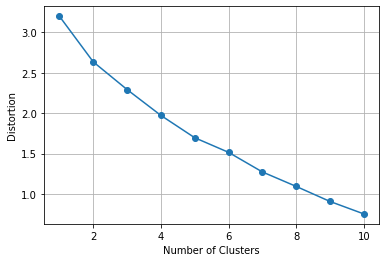

In [232]:
#Elbow metric to evaluate model performance
print("Distortion: %.2f" % kmeans.inertia_)

distortions=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,
              init='k-means++',
              n_init=10,
              max_iter=300,
              random_state=0)
    km.fit(chengdu_grouped_clustering)
    distortions.append(km.inertia_)
plt.plot(range(1,11),distortions,marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.grid()
plt.savefig("./fig3.png")
plt.show()

In [233]:
# set number of clusters
kclusters = 4

chengdu_grouped_clustering = chengdu_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chengdu_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3])

In [234]:
distortions

[3.2003943532002648,
 2.636055549507252,
 2.2933974606485745,
 1.9734992788492185,
 1.6972864486103183,
 1.5165237686961142,
 1.2740280449120656,
 1.0949948429398781,
 0.9087660214803618,
 0.7543782663783208]

In [235]:
chengdu_geo = r'chengdu.json' # geojson file

# create a plain world map
latitude = 30.663429
longitude = 104.072422
map_chengdu = folium.Map(location=[latitude, longitude], zoom_start=11,tiles='Mapbox Bright')

In [236]:
data

,Borough,longitude,latitude,EestatePrice
0,ChenHua,104.153661,30.681403,16135
1,WuHou,104.055946,30.645411,17288
2,JinJiang,104.121031,30.632947,20100
3,LongQuanYi,104.313177,30.596178,11577
4,QinYang,104.020544,30.674066,20329
5,PiDu,103.871470,30.852131,10102
6,WenJiang,103.834341,30.726763,11323
7,XinDu,104.157378,30.832607,10794
8,ShuangLiu,103.958189,30.565774,13276
9,JinNiu,104.055669,30.716153,14695


In [237]:
chinese_name = {'JinJiang':'锦江区', 'QinYang':'青羊区', 'JinNiu':'金牛区', 'WuHou':'武侯区', 'ChenHua':'成华区', 'LongQuanYi':'龙泉驿区', 
                 'XinDu':'新都区', 'WenJiang':'温江区', 'ShuangLiu':'双流区', 'PiDu':'郫都区', 'JianYang':'简阳市', 'ChongZhou':'崇州市',
               'QiongLai':'邛崃市', 'PengZhou':'彭州市', 'DuJiangYan':'都江堰市', 'XinJin':'新津县', 'PuJiang':'蒲江县', 'DaYi':'大邑县',
                'JinTang':'金堂县', 'QingBaiJiang':'青白江区'}

In [238]:
#data.drop([0,11],axis = 0,inplace = True)

In [239]:
data['chinese_name']=data['Borough'].map(lambda x :chinese_name[x])

In [240]:
data

,Borough,longitude,latitude,EestatePrice,chinese_name
0,ChenHua,104.153661,30.681403,16135,成华区
1,WuHou,104.055946,30.645411,17288,武侯区
2,JinJiang,104.121031,30.632947,20100,锦江区
3,LongQuanYi,104.313177,30.596178,11577,龙泉驿区
4,QinYang,104.020544,30.674066,20329,青羊区
5,PiDu,103.871470,30.852131,10102,郫都区
6,WenJiang,103.834341,30.726763,11323,温江区
7,XinDu,104.157378,30.832607,10794,新都区
8,ShuangLiu,103.958189,30.565774,13276,双流区
9,JinNiu,104.055669,30.716153,14695,金牛区


In [241]:
a = open(r'成都市.json',encoding = 'utf-8')
t = json.load(a)

In [242]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
map_chengdu.choropleth(
    geo_data=t,
    data=data,
    columns=['chinese_name', 'EestatePrice'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='The Real Eestate Price Of Chengdu'
)

# display map
map_chengdu

C:\Users\mac\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [243]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

chengdu_merged = data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
chengdu_merged = chengdu_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Borough')

chengdu_merged # check the last columns!

,Borough,longitude,latitude,EestatePrice,chinese_name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ChenHua,104.153661,30.681403,16135,成华区,1,Coffee Shop,Shopping Mall,Pizza Place,Café,Sandwich Place,Bus Station,Music Venue,Fast Food Restaurant,Food Court,Department Store
1,WuHou,104.055946,30.645411,17288,武侯区,1,Hotel,Coffee Shop,Shopping Mall,Hostel,Metro Station,Park,Szechuan Restaurant,Italian Restaurant,Snack Place,Bookstore
2,JinJiang,104.121031,30.632947,20100,锦江区,1,Coffee Shop,Fast Food Restaurant,Shopping Mall,Hotel,Movie Theater,Pizza Place,Cocktail Bar,Nightclub,Sandwich Place,Italian Restaurant
3,LongQuanYi,104.313177,30.596178,11577,龙泉驿区,1,Gym / Fitness Center,Mountain,Art Gallery,Hotel,Bus Station,Historic Site,German Restaurant,Donut Shop,Electronics Store,Fast Food Restaurant
4,QinYang,104.020544,30.674066,20329,青羊区,1,Coffee Shop,Hotel,Chinese Restaurant,Hostel,Noodle House,Park,Pizza Place,Historic Site,History Museum,Department Store
5,PiDu,103.871470,30.852131,10102,郫都区,2,Park,Train Station,Art Museum,Asian Restaurant,Zoo Exhibit,Greek Restaurant,Donut Shop,Electronics Store,Fast Food Restaurant,Fish & Chips Shop
6,WenJiang,103.834341,30.726763,11323,温江区,1,Fast Food Restaurant,Coffee Shop,Shopping Mall,Park,Snack Place,Supermarket,Cocktail Bar,Convenience Store,Department Store,Donut Shop
7,XinDu,104.157378,30.832607,10794,新都区,1,Chinese Restaurant,Hotel,Multiplex,Asian Restaurant,Auto Workshop,Business Service,Zoo Exhibit,Greek Restaurant,Electronics Store,Fast Food Restaurant
8,ShuangLiu,103.958189,30.565774,13276,双流区,1,Coffee Shop,Fast Food Restaurant,Airport Lounge,Airport Service,Hotel,Sandwich Place,Airport,Snack Place,Outlet Mall,Pizza Place
9,JinNiu,104.055669,30.716153,14695,金牛区,1,Hotel,Hostel,Coffee Shop,Noodle House,Fast Food Restaurant,Zoo Exhibit,Temple,Furniture / Home Store,Multiplex,Metro Station


In [244]:

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chengdu_merged['latitude'], chengdu_merged['longitude'], chengdu_merged['Borough'], chengdu_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_chengdu)
       
map_chengdu